Assembling Downloaded Game Statistics
===

In [51]:
import numpy as np
import goldsberry
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
pd.set_option("display.max_columns",50) # Change Pandas Display Options
%matplotlib inline

In [52]:
plt.rcParams['figure.dpi'] = 100.0
plt.rcParams['figure.figsize'] = [6.0, 4.0]

In [53]:
SEASON_LIST = list(reversed(['2016-17','2015-16','2014-15','2013-14','2012-13']))

In [54]:
def get_games(season):
    '''Downloads and returns as a DataFrame a set of games and basic stats for a specified season.'''
    gameids = goldsberry.GameIDs(Season=season)
    gameids = pd.DataFrame(gameids.game_list())
    return gameids

In [55]:
def get_all_games():
    keep_cols = ['TEAM_ID','GAME_ID','GAME_DATE','PLUS_MINUS','MATCHUP']
    all_games = None
    for season in SEASON_LIST:
        games = get_games(season)[keep_cols]
        games[['TEAM_ID','GAME_ID']] = games[['TEAM_ID','GAME_ID']].astype(int)
        if all_games is None:
            all_games = games
        else:
            all_games = pd.concat([all_games, games])
    return all_games

all_games = get_all_games()
all_games.head()

,TEAM_ID,GAME_ID,GAME_DATE,PLUS_MINUS,MATCHUP
0,1610612748,21200845,2013-02-26,12,MIA vs. SAC
1,1610612743,21201144,2013-04-06,18,DEN vs. HOU
2,1610612757,21200923,2013-03-08,30,POR @ SAS
3,1610612746,21201121,2013-04-03,25,LAC vs. PHX
4,1610612739,21200724,2013-02-06,27,CLE vs. CHA


In [56]:
# First step: create entire database of all games for all seasons
# With all statistics
def assemble_all_stats():
    games = None
    join_on = ['TEAM_ID','GAME_ID']
    for stats_type in ('advanced','fourfactors','misc','scoring'):
        dfs = [pd.read_csv('data/{}_{}.csv'.format(stats_type.title(), season),
                          dtype={'TEAM_ID': np.int32, 'GAME_ID': np.int32}).set_index(join_on) \
               for season in SEASON_LIST]
        
        single_stat = pd.concat(dfs)
        #print single_stat.head()
        if games is not None:
            games = pd.concat([games, single_stat], axis=1)
        else:
            games = single_stat
    return games

all_stats = assemble_all_stats()
all_stats.head()

AST_PCT  AST_RATIO  AST_TOV  DEF_RATING  DREB_PCT  \
TEAM_ID    GAME_ID                                                       
1610612737 21200018    0.575       17.9     1.77       108.2     0.558   
           21200040    0.488       16.3     1.82       100.3     0.788   
           21200055    0.632       18.0     1.41        92.5     0.756   
           21200072    0.588       16.5     1.54       105.5     0.784   
           21200091    0.667       16.5     0.91        96.2     0.795   

                     EFG_PCT     MIN  NET_RATING  OFF_RATING  OREB_PCT   PACE  \
TEAM_ID    GAME_ID                                                              
1610612737 21200018    0.512  240:00        -4.6       103.6     0.167  99.62   
           21200040    0.542  240:00        14.2       114.5     0.286  92.74   
           21200055    0.477  240:00         3.9        96.4     0.362  92.62   
           21200072    0.475  240:00       -10.9        94.6     0.200  92.04   
           21200091    0.479  240:00       -12.7        83.5     0.250  91.78   

                       PIE  REB_PCT TEAM_ABBREVIATION  TEAM_CITY  TEAM_NAME  \
TEAM_ID    GAME_ID                                                            
1610612737 21200018  0.483    0.383               ATL    Atlanta      Hawks   
           21200040  0.522    0.507               ATL    Atlanta      Hawks   
           21200055  0.517    0.554               ATL    Atlanta      Hawks   
           21200072  0.459    0.500               ATL    Atlanta      Hawks   
           21200091  0.411    0.519               ATL    Atlanta      Hawks   

                     TM_TOV_PCT  TS_PCT  USG_PCT  EFG_PCT  FTA_RATE     MIN  \
TEAM_ID    GAME_ID                                                            
1610612737 21200018      13.201   0.551    0.200    0.512     0.200  240:00   
           21200040      12.115   0.566    0.198    0.542     0.241  240:00   
           21200055      18.422   0.482    0.200    0.477     0.138  240:00   
           21200072      13.824   0.505    0.200    0.475     0.198  240:00   
           21200091      24.165   0.481    0.200    0.479     0.222  240:00   

                     OPP_EFG_PCT  OPP_FTA_RATE  OPP_OREB_PCT    ...      \
TEAM_ID    GAME_ID                                              ...       
1610612737 21200018        0.467         0.322         0.442    ...       
           21200040        0.528         0.310         0.212    ...       
           21200055        0.459         0.106         0.244    ...       
           21200072        0.533         0.211         0.216    ...       
           21200091        0.494         0.098         0.205    ...       

                     PTS_FB  PTS_OFF_TOV PTS_PAINT TEAM_ABBREVIATION  \
TEAM_ID    GAME_ID                                                     
1610612737 21200018    33.0         21.0      56.0               ATL   
           21200040     7.0         31.0      42.0               ATL   
           21200055    13.0         18.0      48.0               ATL   
           21200072    19.0         16.0      26.0               ATL   
           21200091     9.0         12.0      22.0               ATL   

                     TEAM_CITY  TEAM_NAME     MIN  PCT_AST_2PM PCT_AST_3PM  \
TEAM_ID    GAME_ID                                                           
1610612737 21200018    Atlanta      Hawks  240:00        0.515       0.857   
           21200040    Atlanta      Hawks  240:00        0.394       0.875   
           21200055    Atlanta      Hawks  240:00        0.548       1.000   
           21200072    Atlanta      Hawks  240:00        0.520       0.778   
           21200091    Atlanta      Hawks  240:00        0.571       0.889   

                     PCT_AST_FGM  PCT_FGA_2PT  PCT_FGA_3PT  PCT_PTS_2PT  \
TEAM_ID    GAME_ID                                                        
1610612737 21200018        0.575        0.741        0.259        0.647   
           21200040    

In [57]:
# Join the point spread so it gets a running average calculation
all_stats = all_stats.reset_index().set_index(['TEAM_ID','GAME_ID']).join(
                       all_games.reset_index().set_index(['TEAM_ID','GAME_ID']))
all_stats.head()

AST_PCT  AST_RATIO  AST_TOV  DEF_RATING  DREB_PCT  \
TEAM_ID    GAME_ID                                                       
1610612737 21200018    0.575       17.9     1.77       108.2     0.558   
           21200040    0.488       16.3     1.82       100.3     0.788   
           21200055    0.632       18.0     1.41        92.5     0.756   
           21200072    0.588       16.5     1.54       105.5     0.784   
           21200091    0.667       16.5     0.91        96.2     0.795   

                     EFG_PCT     MIN  NET_RATING  OFF_RATING  OREB_PCT   PACE  \
TEAM_ID    GAME_ID                                                              
1610612737 21200018    0.512  240:00        -4.6       103.6     0.167  99.62   
           21200040    0.542  240:00        14.2       114.5     0.286  92.74   
           21200055    0.477  240:00         3.9        96.4     0.362  92.62   
           21200072    0.475  240:00       -10.9        94.6     0.200  92.04   
           21200091    0.479  240:00       -12.7        83.5     0.250  91.78   

                       PIE  REB_PCT  TEAM_ABBREVIATION TEAM_CITY TEAM_NAME  \
TEAM_ID    GAME_ID                                                           
1610612737 21200018  0.483    0.383                ATL   Atlanta     Hawks   
           21200040  0.522    0.507                ATL   Atlanta     Hawks   
           21200055  0.517    0.554                ATL   Atlanta     Hawks   
           21200072  0.459    0.500                ATL   Atlanta     Hawks   
           21200091  0.411    0.519                ATL   Atlanta     Hawks   

                     TM_TOV_PCT  TS_PCT  USG_PCT  EFG_PCT  FTA_RATE     MIN  \
TEAM_ID    GAME_ID                                                            
1610612737 21200018      13.201   0.551    0.200    0.512     0.200  240:00   
           21200040      12.115   0.566    0.198    0.542     0.241  240:00   
           21200055      18.422   0.482    0.200    0.477     0.138  240:00   
           21200072      13.824   0.505    0.200    0.475     0.198  240:00   
           21200091      24.165   0.481    0.200    0.479     0.222  240:00   

                     OPP_EFG_PCT  OPP_FTA_RATE  OPP_OREB_PCT     ...       \
TEAM_ID    GAME_ID                                               ...        
1610612737 21200018        0.467         0.322         0.442     ...        
           21200040        0.528         0.310         0.212     ...        
           21200055        0.459         0.106         0.244     ...        
           21200072        0.533         0.211         0.216     ...        
           21200091        0.494         0.098         0.205     ...        

                    TEAM_CITY TEAM_NAME     MIN PCT_AST_2PM PCT_AST_3PM  \
TEAM_ID    GAME_ID                                                        
1610612737 21200018   Atlanta     Hawks  240:00       0.515       0.857   
           21200040   Atlanta     Hawks  240:00       0.394       0.875   
           21200055   Atlanta     Hawks  240:00       0.548       1.000   
           21200072   Atlanta     Hawks  240:00       0.520       0.778   
           21200091   Atlanta     Hawks  240:00       0.571       0.889   

                     PCT_AST_FGM  PCT_FGA_2PT  PCT_FGA_3PT PCT_PTS_2PT  \
TEAM_ID    GAME_ID                                                       
1610612737 21200018        0.575        0.741        0.259       0.647   
           21200040        0.488        0.699        0.301       0.635   
           21200055        0.632        0.747        0.253       0.697   
           21200072        0.588        0.691        0.309       0.562   
           21200091        0.667        0.653        0.347       0.553   

                     PCT_PTS_2PT_MR  PCT_PTS_3PT  PCT_PTS_FB  PCT_PTS_FT  \
TEAM_ID    GAME_ID                                                         
1610612737 21200018           0.098        0.206       0.324       0.147   
           21200040 

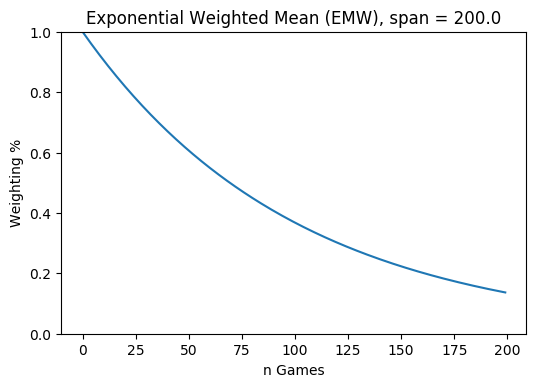

In [100]:
# Impact of Exponential Weighting on a per-game basis (as function of Nspan)
Nspan = 200.
alpha = 2./(Nspan + 1)
weights = [(1-alpha)**k for k in range(0,200)]
plt.plot(weights)
plt.ylim(0,1)
plt.title("Exponential Weighted Mean (EMW), span = %s"%(Nspan))
plt.xlabel("n Games")
plt.ylabel("Weighting %")

In [38]:
# Calculate EWM:
# 1. Group By TEAM_ID and GAME_ID
# 2. Sort by GAME_ID
all_stats_ewm = all_stats.reset_index().groupby(['TEAM_ID','GAME_ID']).sum() \
                         .sort_index(level=[0,1]).shift(1) \
                         .ewm(span=200).mean()
                         #.rolling(40, min_periods=1).mean()
                         #.rolling(80, min_periods=1).mean()
                
                         
all_stats_ewm.head()

AST_PCT  AST_RATIO   AST_TOV  DEF_RATING  DREB_PCT  \
TEAM_ID    GAME_ID                                                        
1610612737 21200018      NaN        NaN       NaN         NaN       NaN   
           21200040  0.57500     17.900  1.770000  108.200000  0.558000   
           21200055  0.53150     17.100  1.795000  104.250000  0.673000   
           21200072  0.56500     17.400  1.666667  100.333333  0.700667   
           21200091  0.57075     17.175  1.635000  101.625000  0.721500   

                      EFG_PCT  NET_RATING  OFF_RATING  OREB_PCT       PACE  \
TEAM_ID    GAME_ID                                                           
1610612737 21200018       NaN         NaN         NaN       NaN        NaN   
           21200040  0.512000       -4.60  103.600000  0.167000  99.620000   
           21200055  0.527000        4.80  109.050000  0.226500  96.180000   
           21200072  0.510333        4.50  104.833333  0.271667  94.993333   
           21200091  0.501500        0.65  102.275000  0.253750  94.255000   

                          PIE   REB_PCT  TM_TOV_PCT  TS_PCT   USG_PCT  \
TEAM_ID    GAME_ID                                                      
1610612737 21200018       NaN       NaN         NaN     NaN       NaN   
           21200040  0.483000  0.383000   13.201000  0.5510  0.200000   
           21200055  0.502500  0.445000   12.658000  0.5585  0.199000   
           21200072  0.507333  0.481333   14.579333  0.5330  0.199333   
           21200091  0.495250  0.486000   14.390500  0.5260  0.199500   

                      EFG_PCT  FTA_RATE  OPP_EFG_PCT  OPP_FTA_RATE  \
TEAM_ID    GAME_ID                                                   
1610612737 21200018       NaN       NaN          NaN           NaN   
           21200040  0.512000   0.20000     0.467000       0.32200   
           21200055  0.527000   0.22050     0.497500       0.31600   
           21200072  0.510333   0.19300     0.484667       0.24600   
           21200091  0.501500   0.19425     0.496750       0.23725   

                     OPP_OREB_PCT  OPP_TOV_PCT  OREB_PCT  TM_TOV_PCT  \
TEAM_ID    GAME_ID                                                     
1610612737 21200018           NaN          NaN       NaN         NaN   
           21200040      0.442000       0.2080  0.167000    0.132000   
           21200055      0.327000       0.2150  0.226500    0.126500   
           21200072      0.299333       0.1970  0.271667    0.145667   
           21200091      0.278500       0.1895  0.253750    0.143750   

                          BLK  BLKA     ...      OPP_PTS_OFF_TOV  \
TEAM_ID    GAME_ID                      ...                        
1610612737 21200018       NaN   NaN     ...                  NaN   
           21200040  4.000000   2.0     ...            17.000000   
           21200055  2.500000   5.5     ...            16.500000   
           21200072  2.666667   6.0     ...            19.666667   
           21200091  3.250000   5.0     ...            18.750000   

                     OPP_PTS_PAINT         PF        PFD  PTS_2ND_CHANCE  \
TEAM_ID    GAME_ID                                                         
1610612737 21200018            NaN        NaN        NaN             NaN   
           21200040      50.000000  26.000000  18.000000        9.000000   
           21200055      44.000000  23.000000  19.500000       12.500000   
           21200072      41.333333  20.333333  17.666667       14.333333   
           21200091      41.000000  19.250000  18.750000       13.500000   

                        PTS_FB  PTS_OFF_TOV  PTS_PAINT  PCT_AST_2PM  \
TEAM_ID    GAME_ID                                                    
1610612737 21200018        NaN          NaN        NaN          NaN   
           21200040  33.000000    21.000000  56.000000     0.515000   
           21200055  20.000000    26.000000  49.000000     0.454500   
           21200072  17.666667    23.333333  48.666667     0.485667   
    

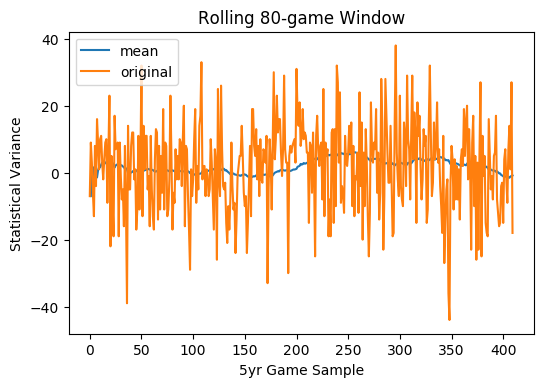

In [48]:
# Check that the EWM is behaving as expected
teamid = all_stats_ewm.index.levels[0][0]
plt.plot(all_stats_ewm.loc[(teamid,slice(None))]['PLUS_MINUS'].values, label='mean')
plt.plot(all_stats.loc[(teamid,slice(None))]['PLUS_MINUS'].values, label='original')
plt.legend()
plt.title('Rolling 80-game Window')
plt.xlabel("5yr Game Sample")
plt.ylabel("Statistical Variance")
plt.rcParams['figure.figsize'] = [6.0, 4.0]

In [47]:
#all_games_stats = all_games.set_index(['TEAM_ID','GAME_ID']).join(all_stats_ewm)
all_games_stats = all_games.set_index(['TEAM_ID','GAME_ID'])[['MATCHUP','GAME_DATE']].join(all_stats_ewm)
all_games_stats = all_games_stats.reset_index()
all_games_stats.head()

,TEAM_ID,GAME_ID,MATCHUP,GAME_DATE,AST_PCT,AST_RATIO,AST_TOV,DEF_RATING,DREB_PCT,EFG_PCT,NET_RATING,OFF_RATING,OREB_PCT,PACE,PIE,REB_PCT,TM_TOV_PCT,TS_PCT,USG_PCT,EFG_PCT,FTA_RATE,OPP_EFG_PCT,OPP_FTA_RATE,OPP_OREB_PCT,OPP_TOV_PCT,...,OPP_PTS_OFF_TOV,OPP_PTS_PAINT,PF,PFD,PTS_2ND_CHANCE,PTS_FB,PTS_OFF_TOV,PTS_PAINT,PCT_AST_2PM,PCT_AST_3PM,PCT_AST_FGM,PCT_FGA_2PT,PCT_FGA_3PT,PCT_PTS_2PT,PCT_PTS_2PT_MR,PCT_PTS_3PT,PCT_PTS_FB,PCT_PTS_FT,PCT_PTS_OFF_TOV,PCT_PTS_PAINT,PCT_UAST_2PM,PCT_UAST_3PM,PCT_UAST_FGM,index,PLUS_MINUS
0,1610612748,21200845,MIA vs. SAC,2013-02-26,0.559488,17.33250,1.769625,104.73375,0.744538,0.535263,3.48500,108.21500,0.228300,95.676000,0.516825,0.489987,14.378512,0.568487,0.199113,0.535263,0.272713,0.512562,0.282025,0.255462,0.160050,...,15.5125,42.575,19.9375,19.3750,11.3125,14.5750,19.2625,46.000,0.492425,0.815538,0.559488,0.728937,0.271075,0.607713,0.161250,0.234012,0.141050,0.158200,0.186200,0.446475,0.507587,0.184462,0.440513,937.975,1.8000
1,1610612743,21201144,DEN vs. HOU,2013-04-06,0.598475,17.78000,1.777875,102.70375,0.720513,0.514712,4.64875,107.35750,0.304812,97.341750,0.532675,0.514487,15.221713,0.548162,0.198963,0.514712,0.308813,0.496600,0.269500,0.279487,0.158637,...,17.0750,40.750,20.4125,21.5375,15.4875,19.0500,19.4000,56.350,0.550625,0.841337,0.598475,0.773050,0.226987,0.643238,0.107237,0.185125,0.180550,0.171562,0.184763,0.536000,0.449388,0.133675,0.401538,787.175,4.0625
2,1610612757,21200923,POR @ SAS,2013-03-08,0.568725,16.26625,1.585250,106.64750,0.739888,0.491663,-4.02625,102.61875,0.259600,96.607250,0.470425,0.495212,15.145025,0.531888,0.199188,0.491663,0.271988,0.507087,0.279913,0.260137,0.137675,...,17.4625,45.800,20.3375,20.1125,15.3875,12.1000,15.3500,39.900,0.508950,0.789475,0.568725,0.726313,0.273725,0.597663,0.201150,0.228287,0.117625,0.174050,0.154263,0.396562,0.491050,0.198025,0.431275,1226.075,-3.5375
3,1610612746,21201121,LAC vs. PHX,2013-04-03,0.613975,18.09875,1.745875,101.86500,0.739338,0.523650,5.31500,107.18000,0.281225,94.358500,0.540025,0.513475,15.579100,0.556900,0.198363,0.523650,0.297175,0.498525,0.304875,0.260675,0.168950,...,16.5250,38.150,20.8750,20.9875,14.0250,15.5750,19.2375,44.725,0.552337,0.861350,0.613975,0.719250,0.280800,0.600763,0.159550,0.231687,0.153650,0.167550,0.189913,0.441250,0.447675,0.138662,0.386025,1079.675,5.3875
4,1610612739,21200724,CLE vs. CHA,2013-02-06,0.595263,16.60250,1.633875,105.92875,0.740563,0.491187,-3.08750,102.84375,0.256213,97.184375,0.469713,0.493675,14.794300,0.533100,0.198800,0.491187,0.280225,0.513450,0.305963,0.259450,0.152975,...,16.1875,42.600,21.4375,20.6500,13.7125,11.6625,16.9250,40.275,0.522812,0.828200,0.595263,0.689300,0.310700,0.552863,0.150638,0.267275,0.115663,0.179850,0.170125,0.402300,0.477200,0.171800,0.404738,1412.925,-2.0500


In [12]:
# Split based on home or away
home_df = all_games_stats[all_games_stats['MATCHUP'].str.contains('vs.')].set_index('GAME_ID')
home_df.columns = [c + '_HOME' for c in home_df.columns]

away_df = all_games_stats[all_games_stats['MATCHUP'].str.contains('@')].set_index('GAME_ID')
away_df.columns = [c + '_AWAY' for c in away_df.columns]

final_df = pd.concat([home_df, away_df], axis=1)

# Save the target
final_df['PLUS_MINUS'] = all_games[all_games['MATCHUP'].str.contains('vs.')].set_index('GAME_ID')['PLUS_MINUS']

# get rid of redundant columns
cols_to_delete = ['GAME_ID_HOME','GAME_ID_AWAY', 'GAME_DATE_AWAY','index_HOME','index_AWAY']
final_df.drop(cols_to_delete, axis=1, inplace=True)
final_df.sort_index(level=0).head()

,TEAM_ID_HOME,MATCHUP_HOME,GAME_DATE_HOME,AST_PCT_HOME,AST_RATIO_HOME,AST_TOV_HOME,DEF_RATING_HOME,DREB_PCT_HOME,EFG_PCT_HOME,NET_RATING_HOME,OFF_RATING_HOME,OREB_PCT_HOME,PACE_HOME,PIE_HOME,REB_PCT_HOME,TM_TOV_PCT_HOME,TS_PCT_HOME,USG_PCT_HOME,EFG_PCT_HOME,FTA_RATE_HOME,OPP_EFG_PCT_HOME,OPP_FTA_RATE_HOME,OPP_OREB_PCT_HOME,OPP_TOV_PCT_HOME,OREB_PCT_HOME,...,OPP_PTS_OFF_TOV_AWAY,OPP_PTS_PAINT_AWAY,PF_AWAY,PFD_AWAY,PTS_2ND_CHANCE_AWAY,PTS_FB_AWAY,PTS_OFF_TOV_AWAY,PTS_PAINT_AWAY,PCT_AST_2PM_AWAY,PCT_AST_3PM_AWAY,PCT_AST_FGM_AWAY,PCT_FGA_2PT_AWAY,PCT_FGA_3PT_AWAY,PCT_PTS_2PT_AWAY,PCT_PTS_2PT_MR_AWAY,PCT_PTS_3PT_AWAY,PCT_PTS_FB_AWAY,PCT_PTS_FT_AWAY,PCT_PTS_OFF_TOV_AWAY,PCT_PTS_PAINT_AWAY,PCT_UAST_2PM_AWAY,PCT_UAST_3PM_AWAY,PCT_UAST_FGM_AWAY,PLUS_MINUS_AWAY,PLUS_MINUS
GAME_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
21200001,1610612739,CLE vs. WAS,2012-10-30,0.652450,18.75000,2.120625,105.51000,0.757225,0.524512,3.11125,108.62375,0.210313,99.278500,0.514338,0.485875,13.244100,0.567125,0.198800,0.524512,0.275525,0.504438,0.294775,0.242800,0.139075,0.210313,...,14.8000,37.475,22.3125,20.7500,12.9250,10.3625,16.1500,40.500,0.507300,0.817088,0.584125,0.682325,0.317687,0.542263,0.136350,0.274887,0.103625,0.182763,0.161800,0.405975,0.492700,0.182912,0.415888,0.5375,10
21200002,1610612748,MIA vs. BOS,2012-10-30,0.531863,15.65875,1.536000,110.78625,0.761463,0.501550,-7.21250,103.56875,0.247475,100.827500,0.445275,0.495025,14.925800,0.537850,0.198900,0.501550,0.261000,0.543887,0.278838,0.238550,0.143225,0.247475,...,17.4000,39.075,18.2250,21.6000,13.4625,11.9875,16.1375,42.625,0.538475,0.873562,0.617525,0.688275,0.311737,0.564300,0.149800,0.259150,0.116163,0.176425,0.157488,0.414488,0.461537,0.126450,0.382513,-1.4625,13
21200003,1610612747,LAL vs. DAL,2012-10-30,0.572388,17.39000,1.921750,106.11500,0.769038,0.540512,4.38125,110.49375,0.211087,98.241500,0.528875,0.499237,13.193562,0.577212,0.199038,0.540512,0.317063,0.507000,0.275875,0.230975,0.132987,0.211087,...,15.4375,45.175,17.7500,18.7500,15.1000,13.7125,15.5875,43.200,0.507237,0.869838,0.577313,0.743925,0.256125,0.606975,0.184837,0.218550,0.133137,0.174562,0.152212,0.422225,0.492813,0.130163,0.422725,0.1500,-8
21200004,1610612761,TOR vs. IND,2012-10-31,0.532837,15.59500,1.481375,105.51875,0.790413,0.502013,-0.21375,105.30750,0.279587,100.333000,0.498800,0.534150,14.761663,0.541763,0.199225,0.502013,0.297750,0.514287,0.287475,0.209587,0.136512,0.279587,...,16.0000,46.075,19.4500,18.7375,12.3875,14.0750,15.0000,42.375,0.494475,0.867788,0.577775,0.698113,0.301900,0.590188,0.171437,0.251987,0.138925,0.157700,0.147725,0.418850,0.505550,0.132212,0.422225,-6.2625,-2
21200005,1610612755,PHI vs. DEN,2012-10-31,0.570887,17.15625,1.772500,106.38125,0.754250,0.517988,0.04750,106.43375,0.210675,98.016375,0.506788,0.487362,13.928438,0.559800,0.198975,0.517988,0.264675,0.512187,0.292788,0.245762,0.150912,0.210675,...,13.9000,39.475,18.9875,19.3250,9.7875,7.8000,15.6625,32.700,0.476212,0.811200,0.576025,0.634662,0.365375,0.524425,0.187900,0.324650,0.079075,0.150875,0.160838,0.336637,0.523788,0.188812,0.424013,-2.7875,9


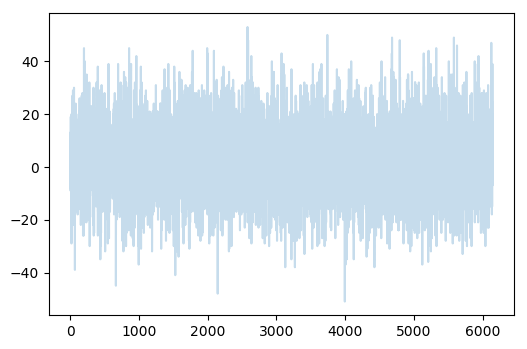

In [29]:
plt.plot(final_df.PLUS_MINUS_HOME.values, alpha=0.5)
plt.plot(final_df.PLUS_MINUS.values, alpha=0.25)

### Looking at the data
Now that everything is loaded into the `final_games` dict, let's peek inside.

In [14]:
final_df.to_csv('data/final_rolling_span80.csv')

In [ ]:
#final_df.to_csv('data/final_ewm_span200.csv')